# Coding Section 11: RDD in Regression Form Code Solutions
## Econ 130
GSIs: Richard Calvo and Julia Paris

### Goals for today
* In small groups, create the necessary variables and run a RDD in regression form

In [22]:
## Clear the workspace and read in the data ('school_bonds_narrow.csv')

# Your Code Here:
rm(list = ls())
narrow_data <- read.csv('school_bonds_narrow.csv') 

In [23]:
## Step 1: Create 2 indicator variables. 
## One will be 1 if margin is greater than threshold. 
## The other will be 1 if margin is less than or equal to the threshold.

# Your Code Here:
## Greater than
narrow_data$greater_than <- 0
narrow_data$greater_than[narrow_data$margin > 0] <- 1

## Less than or equal to
narrow_data$less_than <- 0
narrow_data$less_than[narrow_data$margin <= 0] <- 1

In [24]:
## Create the two linear trend variables by multiplying each indicator
## variable with the 'margin' variable.
## Name these 'greater_trend' and 'less_trend'

# Your Code Here:
narrow_data$greater_trend <- narrow_data$greater_than * narrow_data$margin
narrow_data$less_trend    <- narrow_data$less_than    * narrow_data$margin

In [25]:
## Run the regression! 

## First, try it with f1cap_exp as the dependent variable.

## hint: use the `lm` command and store it to a variable. Then use summary(`your variable`)
## hint: You should have three independent right-hand-side variables as we
## discussed: greater_than as well as the two trend variables you created.

# Your Code Here:
reg <- lm(f1cap_exp ~ greater_than + greater_trend + less_trend, data = narrow_data)
summary(reg)


Call:
lm(formula = f1cap_exp ~ greater_than + greater_trend + less_trend, 
    data = narrow_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -2438  -1470   -688    145  44957 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1059.0      136.4   7.761 1.02e-14 ***
greater_than    1417.1      173.7   8.157 4.36e-16 ***
greater_trend  -1632.7     1218.5  -1.340    0.180    
less_trend      1108.4     1849.1   0.599    0.549    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2904 on 4705 degrees of freedom
  (187 observations deleted due to missingness)
Multiple R-squared:  0.04524,	Adjusted R-squared:  0.04463 
F-statistic: 74.31 on 3 and 4705 DF,  p-value: < 2.2e-16


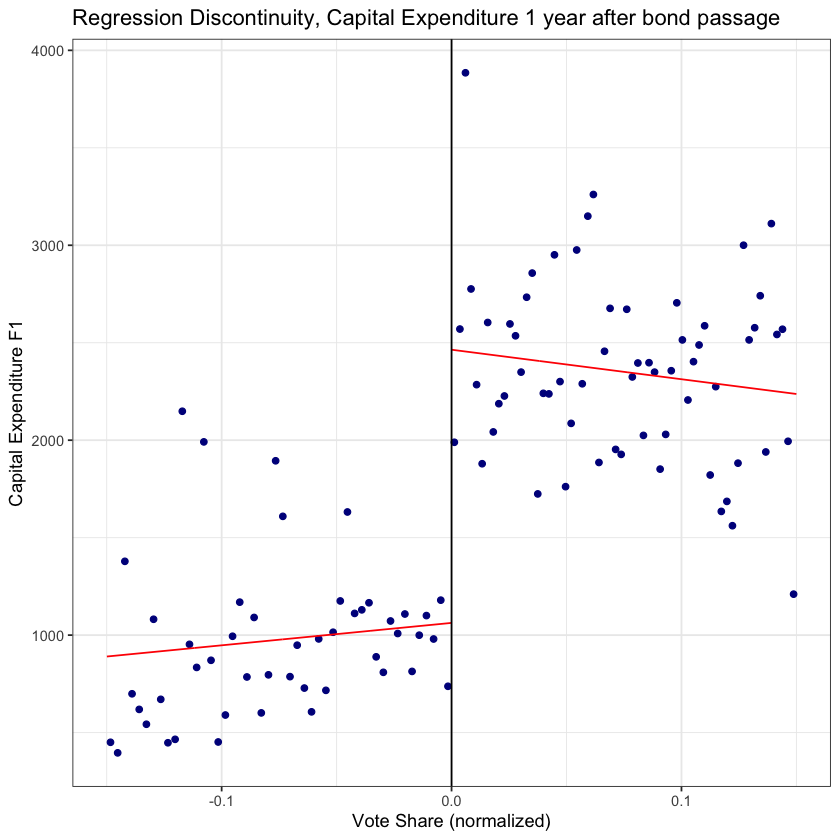

In [26]:
## Here is the plot from last week:

library(rdrobust)
rdplot(y = narrow_data$f1cap_exp, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Capital Expenditure F1", 
       title = "Regression Discontinuity, Capital Expenditure 1 year after bond passage")

## Questions

1. What is the RDD estimate? How do you interpret it?
2. Is the estimate precise?
3. How does it compare to the binscatter visual estimate from last time?

Your answers here: (Click here and fill in your answer into the cell. Command-Enter to exit the cell.)

Now repeat run the regression again, but for `f1noncap_exp`

In [27]:
# Your Code Here:
reg <- lm(f1noncap_exp ~ greater_than + greater_trend + less_trend, data = narrow_data)
summary(reg)


Call:
lm(formula = f1noncap_exp ~ greater_than + greater_trend + less_trend, 
    data = narrow_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -9113  -3354  -1716   1129 114028 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    13108.8      321.0  40.842  < 2e-16 ***
greater_than    -632.2      408.7  -1.547  0.12191    
greater_trend  18723.2     2866.4   6.532 7.18e-11 ***
less_trend     11916.3     4349.9   2.739  0.00618 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6831 on 4705 degrees of freedom
  (187 observations deleted due to missingness)
Multiple R-squared:  0.02129,	Adjusted R-squared:  0.02067 
F-statistic: 34.12 on 3 and 4705 DF,  p-value: < 2.2e-16


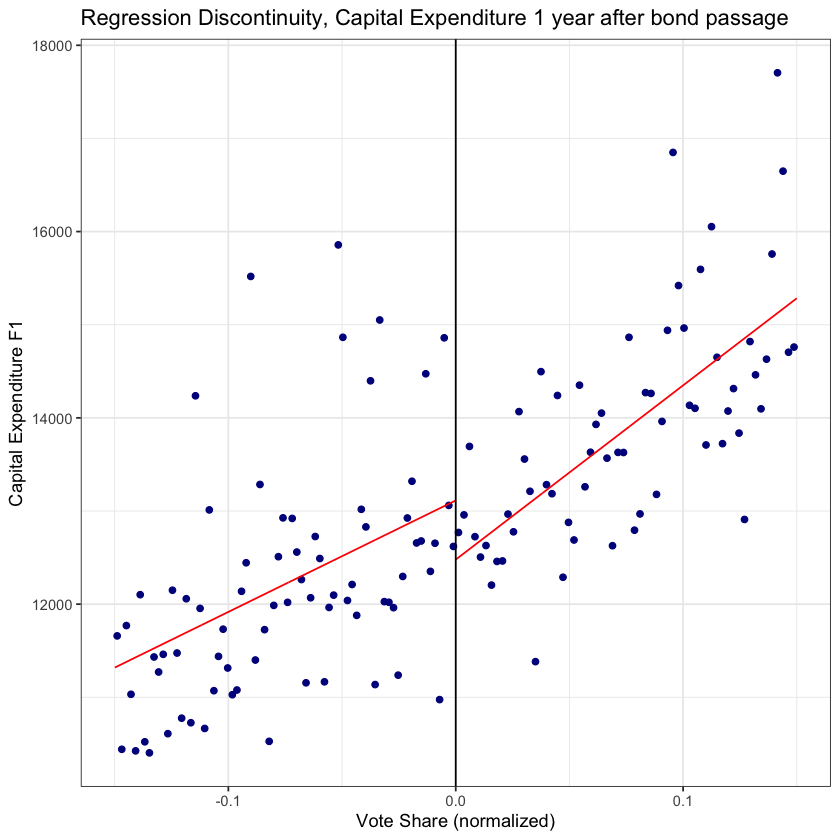

In [28]:
rdplot(y = narrow_data$f1noncap_exp, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Capital Expenditure F1", 
       title = "Regression Discontinuity, Capital Expenditure 1 year after bond passage")

In [29]:
## Now let's add a controls for each state. The variable `stabbr` is has the state abbreviation for each observation.
## We want to treat each state as a separate indicator variable. 
## Hint:Look back at Section 9 for an example of how to do this


In [30]:
#Your Code Here:
reg <- lm(f1cap_exp ~ greater_than + greater_trend + less_trend + factor(stabbr), data = narrow_data)
summary(reg)



Call:
lm(formula = f1cap_exp ~ greater_than + greater_trend + less_trend + 
    factor(stabbr), data = narrow_data)

Residuals:
   Min     1Q Median     3Q    Max 
 -3228  -1419   -657    273  45455 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        524.37     149.91   3.498 0.000473 ***
greater_than      1444.68     170.27   8.485  < 2e-16 ***
greater_trend    -1486.51    1210.30  -1.228 0.219426    
less_trend        2148.13    1820.08   1.180 0.237966    
factor(stabbr)MI    73.96     124.86   0.592 0.553671    
factor(stabbr)NY   295.37     124.71   2.368 0.017903 *  
factor(stabbr)TX  1397.28     133.60  10.459  < 2e-16 ***
factor(stabbr)WI  1277.36     125.95  10.142  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2845 on 4701 degrees of freedom
  (187 observations deleted due to missingness)
Multiple R-squared:  0.08416,	Adjusted R-squared:  0.0828 
F-statistic: 61.71 on 7 and 47

## Please raise your hand when you reach this point!
That is so I know when to start the group disucssion of the material up to here. As you are waiting, please continue on the questions below.

### Longer-run outcomes
Now, let's think about longer-run outcomes. Run the same RDD regression again (with or without the controls, it's up to you), but with outcomes further in the future, such as f2cap_exp, f3_cap_exp, etc.

You may also want to check the rdplot binscatter for andy weird effects (for instance, is the linear trend approximately correct?)

What do you observe? What sorts of things may be causing this?

In [31]:
## Your code here

Observations here

### Future bond passage

Related to the above, also try running the rdplot binscatter for the leads variable `passbond` (f1, f2, f3, etc.).

What do you find? What does it mean for the results of the regression on outcomes one year after bond passage? What about two, three, or four years after bond passage?

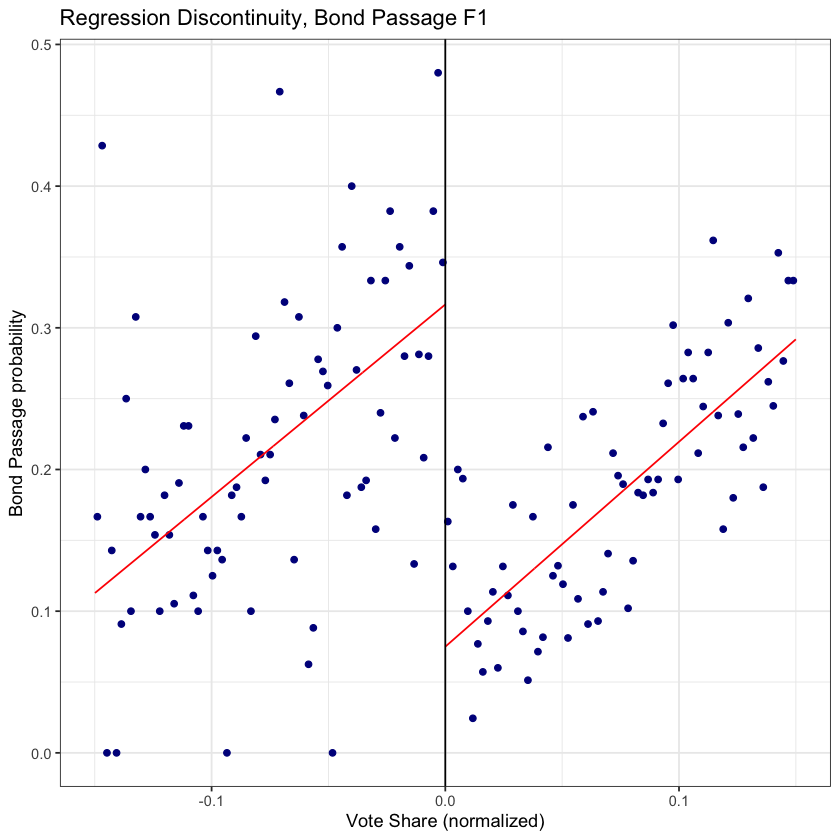

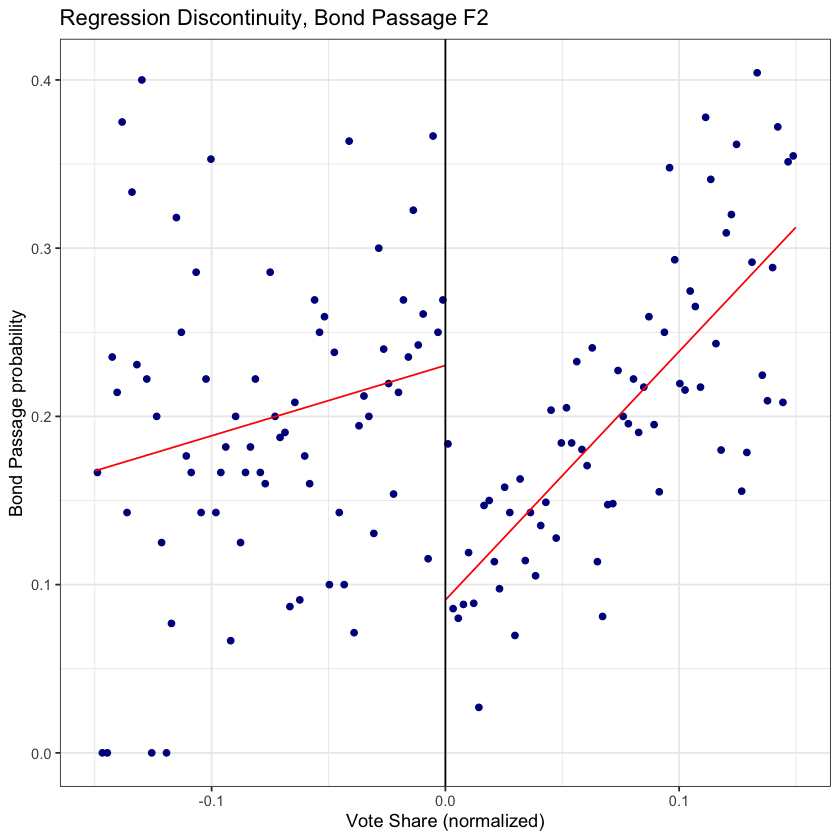

In [32]:
rdplot(y = narrow_data$f1passbond, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Bond Passage probability", 
       title = "Regression Discontinuity, Bond Passage F1")

rdplot(y = narrow_data$f2passbond, x = narrow_data$margin, c=0, p=1, 
       x.label = "Vote Share (normalized)", 
       y.label = "Bond Passage probability", 
       title = "Regression Discontinuity, Bond Passage F2")

It appears that places that barely did not pass bonds in the focus year do in fact pass bonds in the two years afterwards. This suggests that the "control" group is not a pure control and also experiences some treatment. This would imply that our estimates of funding are underestimates.

It also appears that some places that pass bonds in the focus year pass additional bonds in the next few years. That would go the other way and imply that our estimates of funding are overestimates.